# 1 - Raw Data Visualisation

<img src="grideye_camera_view.png" alt="grideye camera view" width="250" height="250" align="left">
<img src="layout.png" alt="layout" width="200" height="200" align="left"> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For some some context here is our setup. 


In [1]:
import pandas as pd
import numpy as np

import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas(tqdm())

import os
import cPickle as pickle

import datetime as dt


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30

0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

### Path to your urinal-data-28-nov_clean _pickle_ file

In [2]:
# pickle_name = "urinal-data-28-nov_clean.p"
# pickle_path = "F:\\Research\\ben\\grideye_urinal"
# pickle_full = os.path.join(pickle_path, pickle_name)

# print("looking in", pickle_full)
pickle_full = "urinal-data-28-nov_clean.p"

### Path to your urinal-data-28-nov_clean _CSV_ file

In [3]:
# csv_name = "urinal-data-28-nov_clean.csv"
# csv_path = "F:\\Research\\ben\\grideye_urinal"
# csv_full = os.path.join(csv_path, csv_name)

# print("looking in", csv_full)
csv_full = "urinal-data-28-nov_clean.csv"

## Clean Up Our Raw data for analyis

In [4]:
     
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_full):
    print("loading pickle")
    df = pd.read_pickle(pickle_full)
   
else:
    print("creating pickle...")
    print("this will take some time...")
    df = pd.read_csv(csv_full)
    df.columns = ["time"]+["P"+str(x) for x in range(64)]
    
    # remove dirty data
    df = df[[(x[:2] != "TT") for x in df["time"]]]
    df = df[[x[16:18] != ":S" for x in df["time"]]]
        
    # drop indexes where camera had fallen down/face was in camera
    df = df.drop(range(0,97710+14234), axis=0) #drop row
    df["time"] = df["time"].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
    df = df.set_index('time')
    
    #flip image
    cols = []
    for y in range(7,-1,-1):
            for x in range(8):
                cols.append(x*8+y)
            
    cols = ["P"+str(x) for x in cols] 
    df = df.reindex(columns=cols)
   
    # reset column names
    df.columns = ["P"+str(x) for x in range(64)]
        
    df.to_pickle(pickle_full)


loading pickle


<IPython.core.display.Javascript object>

### Raw Data
Our dataframe is a composed of rows containing the 64 Grideye Pixels, 
with column P0 - P7 the top line of pixels, and P56 - P63 the bottom line.
Each row is timestamped

In [5]:
df.sample(5)


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
time,,,,,,,,,,,,,,,,,,,,,
2017-11-26 05:02:19,21.25,22.25,22.00,22.75,23.75,22.75,23.50,22.50,22.75,22.5,...,23.00,23.25,22.75,21.25,22.25,22.50,24.00,24.50,22.50,22.75
2017-11-26 15:07:54,23.25,24.00,23.25,23.50,24.50,23.50,24.25,23.00,23.50,23.5,...,23.50,23.50,22.75,23.25,24.50,22.50,24.00,24.25,22.75,23.75
2017-11-27 16:47:20,22.25,23.50,22.50,22.25,23.00,23.50,23.00,21.75,22.25,23.0,...,22.50,21.75,22.25,23.75,23.75,22.00,24.00,23.75,22.75,22.75
2017-11-25 01:10:35,22.00,22.50,22.00,22.50,22.50,22.75,23.00,22.75,21.75,23.0,...,22.25,23.25,21.25,22.25,22.25,24.00,23.25,23.50,22.50,23.75
2017-11-26 15:01:40,23.50,24.00,22.50,23.75,23.75,23.25,24.50,24.50,23.50,23.5,...,22.50,22.25,22.75,23.50,23.00,24.25,22.75,24.00,23.00,23.75


## Visualise Our Data!
We have an 8x8 grid of thermal pixels: Seaborns heatmap is perfect here.
Below we'll look at a typical instance of a person walking in using the left urinal and leaving.
This particular person visited at 4 pm on a Friday

In [6]:
startIn = df.index.searchsorted(dt.datetime(2017, 11, 24, 15, 59,37,0))
endIn = df.index.searchsorted(dt.datetime(2017, 11, 24, 15,59,41,0))

## Urinal Section Visualisation
Below you can see the the Urinal positions with respect to the camera.
The back of a head sits around row 3 or 4.  
You can also 

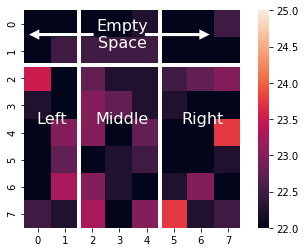

In [51]:
ax = sns.heatmap(framesIn[10], vmin=22, vmax=25,square=True)
ax.vlines([2, 5, 8], *ax.get_xlim(),color='white', linewidth=4)
ax.hlines([2], *ax.get_xlim(),color='white', linewidth=4)
ax.text(0.125, 0.5,'Left', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes,
       color='white',size=16);
ax.text(0.45, 0.5,'Middle', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes,
       color='white',size=16);

ax.text(0.82, 0.5,'Right', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes,
       color='white',size=16);

ax.text(0.45, 0.89,'Empty\nSpace', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes,
       color='white',size=16);
ax.arrow(2.5, 0.89, -2, 0, head_width=0.2, head_length=0.2, fc='w', ec='w',linewidth=3)
ax.arrow(4.5, 0.89, 2, 0, head_width=0.2, head_length=0.2, fc='w', ec='w',linewidth=3)

plt.savefig('layout_sections.png', dpi=600)

### Animation of a Walk in
Here you can see a person walking in to use the left Urinal.

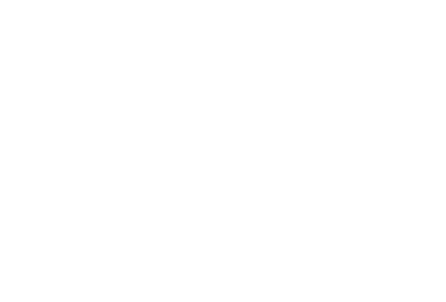

In [9]:
import seaborn as sns
# Low res animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
plt.rcParams['animation.writer'] = 'ffmpeg'
# print(matplotlib.animation.writers.list())
from matplotlib import animation, rc
from IPython.display import HTML

# fig, ax = plt.subplots()
# fig.set_tight_layout(True)
fig = plt.figure()

def init():
    plt.clf()
    sns.heatmap(np.zeros((8, 8)),vmin=22,vmax=25,square=True)
    plt.clf()
#     return (sns,)

def animate(i):
    plt.clf()
    data = framesIn[i]
    sns.heatmap(data, vmin=22,vmax=25,square=True)
#     return (sns,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(framesIn),interval=100,repeat=True)#,blit = True)
HTML(anim.to_html5_video())

#need to return a seaborn object with an "artist object"
#in order to use blit (and therefore speed up rendering)


### Animation of a Walk Out

In [333]:
startOut = df.index.searchsorted(dt.datetime(2017, 11, 24, 16,0,3,0))
endOut = df.index.searchsorted(dt.datetime(2017, 11, 24, 16,0,7,0))

In [334]:

# Person walking to middle: walk in - 9911 , walk out - 10198 df.iloc[9911:10198]
framesOut = []
for row in df.iloc[startOut:endOut].iterrows():
        framesOut.append(np.array(row[1]).reshape(8,8).astype('float'))



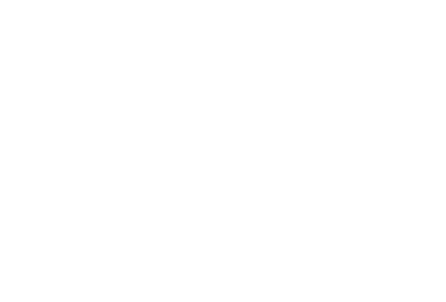

<IPython.core.display.Javascript object>

In [335]:
# Low res animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
plt.rcParams['animation.writer'] = 'ffmpeg'
# print(matplotlib.animation.writers.list())
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig = plt.figure()

def init():
    plt.clf()
    sns.heatmap(np.zeros((8, 8)),vmin=22,vmax=25,square=True)
    plt.clf()
#     return (sns,)

def animate(i):
    plt.clf()
    data = framesOut[i]
    sns.heatmap(data, vmin=22,vmax=25,square=True)
#     return (sns,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(framesOut),interval=100,repeat=True)#,blit = True)
HTML(anim.to_html5_video())

#need to return a seaborn object with an "artist object"
#in order to use blit (and therefore speed up rendering)


You might have noticed how noisy the data is.
There are two main reasons for this.
1. The accuracy and precision of the Grideye is low (&pm;2.5&deg;C, and &pm;0.25&deg;C respectively) <sup>[1](https://industrial.panasonic.com/cdbs/www-data/pdf/ADI8000/ADI8000C53.pdf)</sup>
2. Temperature of air varies in a ventilated (HVAC) system, often more than the Grideye's precision <sup>[2](https://www.sciencedirect.com/science/article/pii/S0360132396000340)</sup>
 
Next we'll figure out how to find a person in this mess of pixels

Go to 2 - __Algorithm Design__